# Part I - (Prosper Loan Dataset exploration)
## by (Asnake Amelo)

## Introduction


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# loading the dataset
loan = pd.read_csv("prosperLoanData.csv")

I will explore the dataset in the below cells

In [3]:
# short discreption of each column
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
# statistical summary of numerical variables
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
# top table view of selected variables
loan[["LoanStatus","IsBorrowerHomeowner","Occupation", "EmploymentStatus", 
      "IncomeRange","IncomeVerifiable","StatedMonthlyIncome", "LoanOriginalAmount",
      "BorrowerState", "DebtToIncomeRatio", "MonthlyLoanPayment"]].head()

,LoanStatus,IsBorrowerHomeowner,Occupation,EmploymentStatus,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,BorrowerState,DebtToIncomeRatio,MonthlyLoanPayment
0,Completed,True,Other,Self-employed,"$25,000-49,999",True,3083.333333,9425,CO,0.17,330.43
1,Current,False,Professional,Employed,"$50,000-74,999",True,6125.000000,10000,CO,0.18,318.93
2,Completed,False,Other,Not available,Not displayed,True,2083.333333,3001,GA,0.06,123.32
3,Current,True,Skilled Labor,Employed,"$25,000-49,999",True,2875.000000,10000,GA,0.15,321.45
4,Current,True,Executive,Employed,"$100,000+",True,9583.333333,15000,MN,0.26,563.97


### What is the structure of your dataset?

> The Dataset contains a list of loans. there are 113937 loans with 81 features. majority of the variables are numeric type and there are few variables that are string datasets such as BorrowerState, Occupation, EmploymentStatus and more. besides there are couple of boolean variables such as IncomeVerifiable, CurrentlyInGroup and IsBorrowerHomeowner. 

### What is/are the main feature(s) of interest in your dataset?

> I'm intersted in figuring out what features best predict the original loan amount in the Dataset

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that stated monthly income, monthly payment and employment status to have greater effect on original loan amount since these features ensure the return of loans to loaners. In addition, occupation, service fee, home ownership, and verifiable income can also have some impact on the amount of the original loan.   

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables. 


## Univariate Exploration

I'll start by looking into the distrubtion of the main (dependent) variable

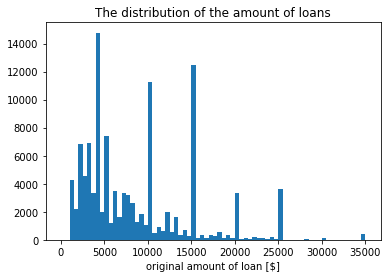

In [3]:
# plot histogram to see the distribution of loan amount
bins = np.arange(0, loan["LoanOriginalAmount"].max()+500, 500)

plt.hist(data=loan, x='LoanOriginalAmount', bins = bins)
plt.xlabel('original amount of loan [$]')
plt.title('The distribution of the amount of loans');

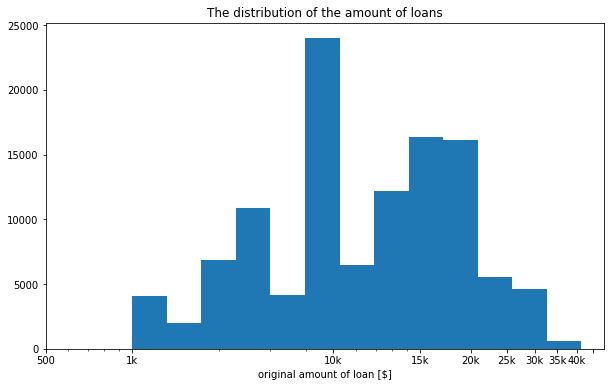

In [4]:
# put on log scale to eliminate long and fragmented tail
bins = 10**np.arange(3, np.log10(loan["LoanOriginalAmount"].max())+0.12, 0.12)

plt.figure(figsize=[10, 6])
plt.hist(data=loan, x='LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 5e3, 1e4, 15e3, 2e4, 25e3, 3e4, 35e3, 4e4], [500, '1k', '10k' ,'15k','20k','25k','30k','35k','40k'])
plt.xlabel('original amount of loan [$]')
plt.title('The distribution of the amount of loans')
plt.show();

## interpretation
The original loan amount has right skewed distribution with majority of loans bieng in lower end below 10,000, and few high loan amount stretched up to 35,000. In log scale, the loan amount has sharp jump on 10,000 and between 15,000 and 20,000.  

I will now investigate the distribution of monthly income in the dataset

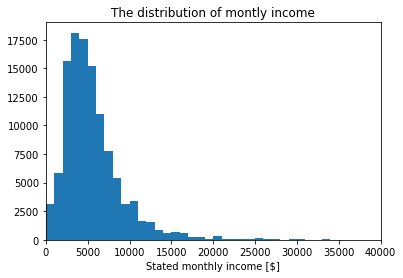

In [12]:
# plot histogram to see the distribution of income
bins = np.arange(0, loan["StatedMonthlyIncome"].max()+1000, 1000)

plt.hist(data=loan, x='StatedMonthlyIncome', bins = bins)
plt.xlabel('Stated monthly income [$]')
plt.xlim(0, 40000)
plt.title('The distribution of montly income');

since the graph is extremely stretched to the right, I wiil look for extreem outlier values in the variable below

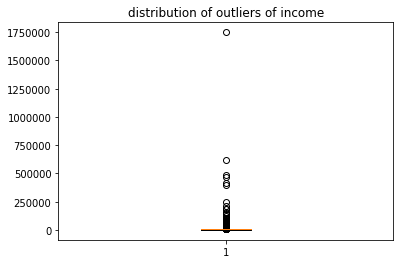

In [8]:
# checking for outlier values in income feature
plt.boxplot(loan['StatedMonthlyIncome'])
plt.title('distribution of outliers of income');

In [9]:
# select high outliers

high_outliers = (loan['StatedMonthlyIncome'] > 20000)
print(high_outliers.sum())

1189


In [11]:
# remove the outlier points 
loan = loan.loc[-high_outliers,:]

redraw the histogram after removing the extreme outliers to focus on importnant data

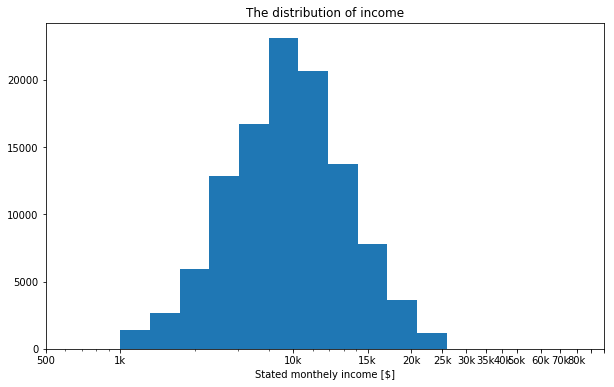

In [12]:
# put on log scale to eliminate long and fragmented tail
bins = 10**np.arange(3, np.log10(loan["StatedMonthlyIncome"].max())+0.12, 0.12)

plt.figure(figsize=[10, 6])
plt.hist(data=loan, x='StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 5e3, 1e4, 15e3, 2e4, 25e3, 3e4, 35e3, 4e4,5e4,6e4,7e4,8e4,9e4], 
           [500, '1k', '10k' ,'15k','20k','25k','30k','35k','40k','5ok','60k','70k','80k'])
plt.xlabel('Stated monthely income [$]')
plt.title('The distribution of income')
plt.show();

in the below cell, I will investigate service fee variable distribution

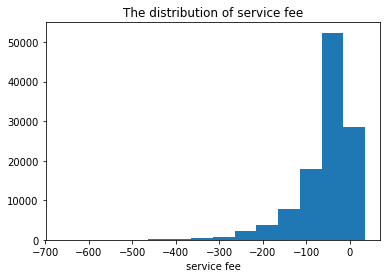

In [39]:
# plot histogram to see the distribution of income
bins = np.arange(-664, loan["LP_ServiceFees"].max()+50, 50)

plt.hist(data=loan, x='LP_ServiceFees', bins = bins)
plt.xlabel('service fee')
plt.title('The distribution of service fee');

the graph is highly stretched to the lower end past zero. the graph was strongly left skewed. unlike other variable service fee variable extendes to negative vaule.

the lets investigate the disribution of monthly payment

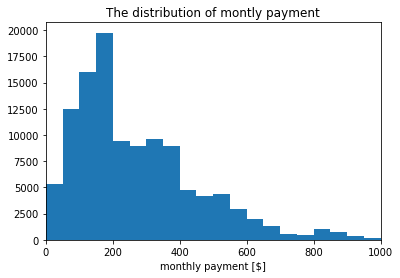

In [44]:
# plot histogram to see the distribution of mothly payments
bins = np.arange(0, loan["MonthlyLoanPayment"].max()+50, 50)

plt.hist(data=loan, x='MonthlyLoanPayment', bins = bins)
plt.xlabel('monthly payment [$]')
plt.xlim([0, 1000])
plt.title('The distribution of montly payment');

the monthly payment feature has strong right skewed distribution even though the extreme values was reduced using xlim

## Interpretation
The distribution of income is right skewed to with majority on the lower end below 10,000, where as there are few values streched to the high end of the income. when the outlier values are removed and plotted using log scale, the majority of the incomes are concentrated around 10,000 with slight left shift. the box plot demonstrated the large number of high outlier values on the upper limit.

I will now look into the other main variable which is employment status

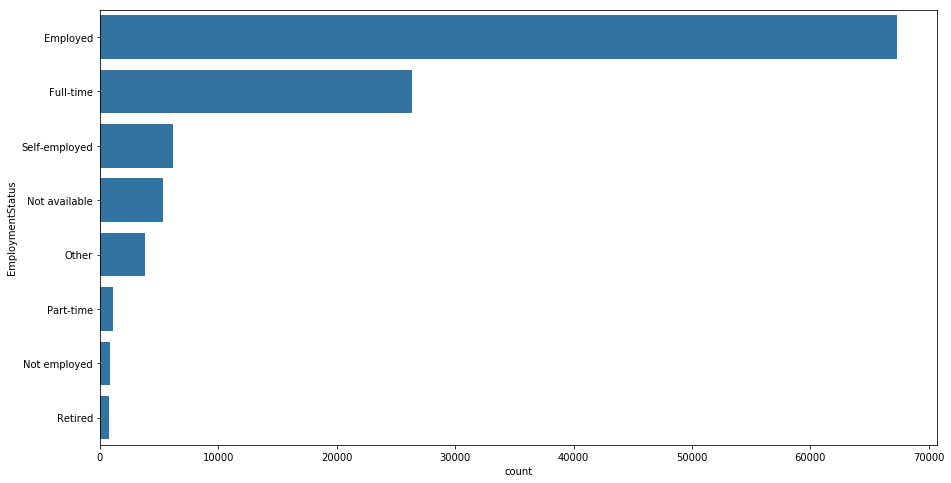

In [25]:
# get the frequency of each value and sort it
freq = loan['EmploymentStatus'].value_counts()

# obtain the endex of the series
loan_order = freq.index
# lets draw employment status to see the count
fig, ax = plt.subplots(figsize=(15,8))
base_color = sb.color_palette()[0]
sb.countplot(data= loan, y='EmploymentStatus', color=base_color, order=loan_order);

## Interpretation
from the above graph we can see that more than 6000 are actually employed, and out of employed more than 1/3 have full time. selfemployed comes next and the rest follows.

let's see the rest of variables of interest on the same chart type

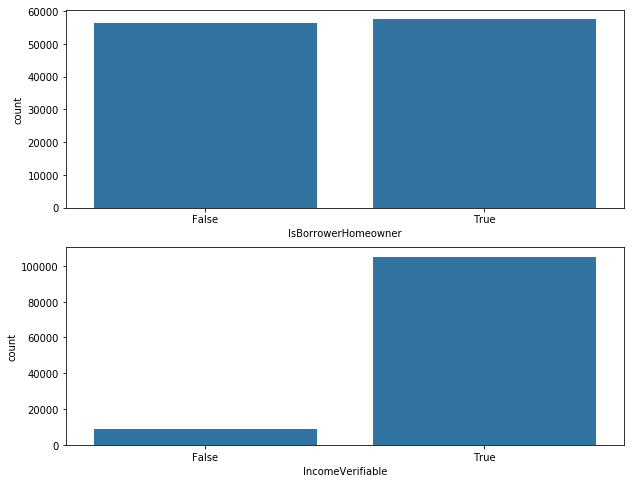

In [29]:
# let's draw the rest of nominal variables together for ease comparison
fig, ax = plt.subplots(nrows=2, figsize = [10,8])

default_color = sb.color_palette()[0]
sb.countplot(data = loan, x = 'IsBorrowerHomeowner', color = default_color, ax = ax[0])
sb.countplot(data = loan, x = 'IncomeVerifiable', color = default_color, ax = ax[1])

plt.show()

## Interpretation
from above cell, we can see that there are fairly equal number of borrowers who owned home and not. nevertheless, the vast majority have income that are verifiable.

I will look into investor variable below

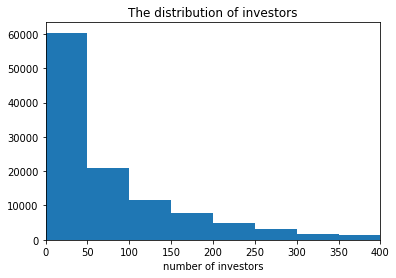

In [5]:
# plot histogram to see the distribution of investors
bins = np.arange(0, loan["Investors"].max()+50, 50)

plt.hist(data=loan, x='Investors', bins = bins)
plt.xlabel('number of investors')
plt.xlim(0, 400)
plt.title('The distribution of investors');

change it into log scale to focus into the data

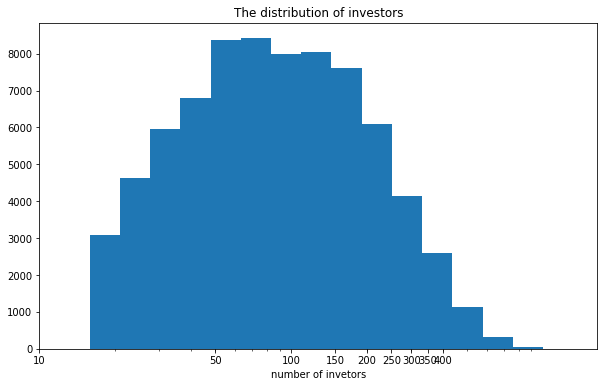

In [11]:
# put on log scale to eliminate long and fragmented tail
bins = 10**np.arange(1.2, np.log10(loan["Investors"].max())+0.12, 0.12)

plt.figure(figsize=[10, 6])
plt.hist(data=loan, x='Investors', bins = bins)
plt.xscale('log')
plt.xticks([10,50,100,150,200,250,300,350,400],[10,50,100,150,200,250,300,350,400])
plt.xlabel('number of invetors')
plt.title('The distribution of investors')
plt.show();

the histogram of the investor variable seemed right skewed even though the extreme outliers were trimed using Xlim. as a result, I transformed it into log scale, which still remained a little right skewed and peaked between 50 and 100.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> during investigation of original loan amount, it looked right skewed with most of the values concentrated on lower end. log transformation was done to offset the variation, and the resulting chart was a little left skewed was sharp raise on 10,000 and another on 15,000 upto 20,000.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> monthly income and investor variable were highly right skewed with many extreme values. for monthly income, the outlier values were trimed using slicing and the remaining data were drawn using log scale transformation which very slightly left skewed graph with its peak on 10,000. for investor variable, the outliers were excluded using Xlim, and the graph was redrawn using log scale which resulted in slightly right skewed graph with its peak between 50 and 100.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

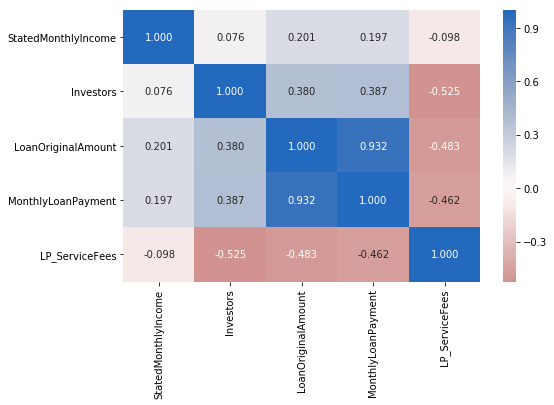

In [32]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loan[['StatedMonthlyIncome','Investors','LoanOriginalAmount', 'MonthlyLoanPayment', 'LP_ServiceFees']].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

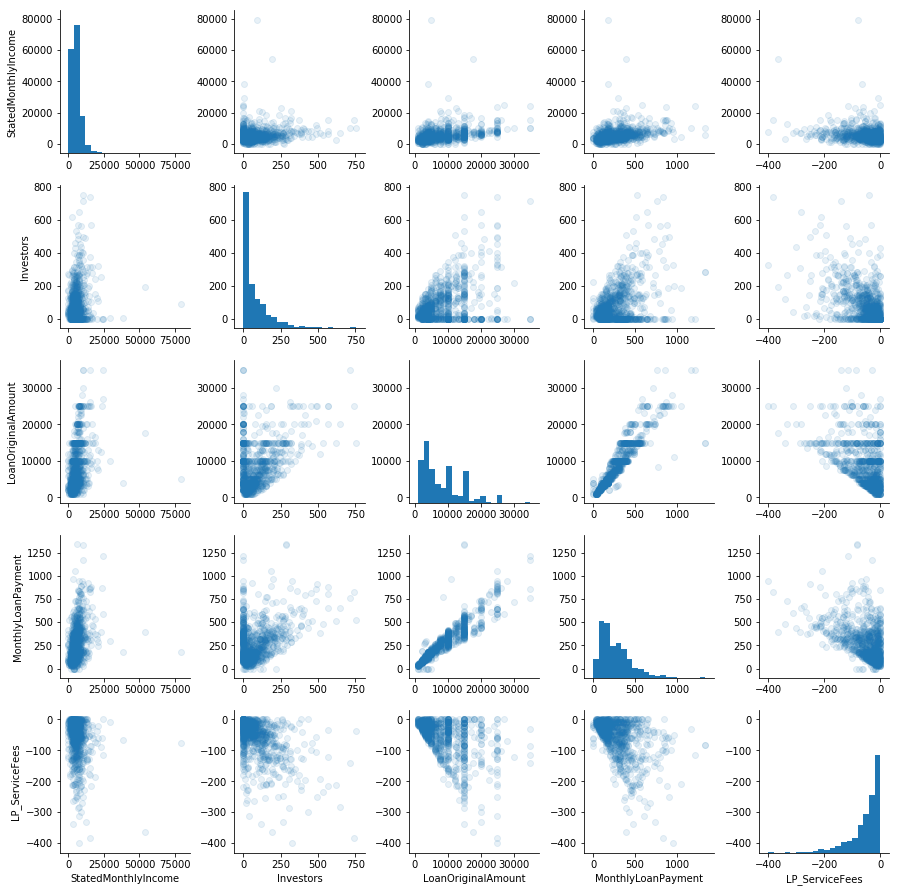

In [49]:
# ploting relation across multiple grids using scatter plot and histogram
numeric_vars =['StatedMonthlyIncome','Investors','LoanOriginalAmount','MonthlyLoanPayment', 'LP_ServiceFees']
loan_samp= loan.sample(n=1000, replace =False)
base_color=sb.color_palette()[0]

g = sb.PairGrid(data = loan_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter, color=base_color, alpha= 1/10);

in the above graph we can see that from 3 main interest vairiables only monthly payment show strong relationship with loan amount. additionally, investors variable is better correlated than montlhy income variable to amount of the loan.

suprisingly, service fee is negatively corrrelated with allother variable in this data set.

it worth looking deep into mothly payment and amount of loan as well as sercive fee and amount of loan below.

In [8]:
# scatter plot function with log scale transformation and xlim
def plotscatter(x,y,z,n, **kwargs):
    plt.scatter( y = y, x=x,  alpha=1/50)
    plt.xlim([0,z])
    plt.xlabel('{} in [$]'.format(n))
    plt.ylabel('loan Amount in [$]')
    plt.yscale('log')
    plt.yticks([ 1e3, 2e3, 5e3, 1e4, 2e4], ['1k', '2k', '5k', '10k', '20k']);
    


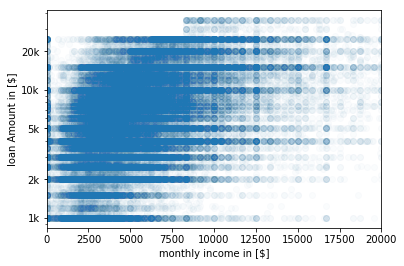

In [10]:
# loan amount Vs monthly income
plotscatter(loan['StatedMonthlyIncome'], loan['LoanOriginalAmount'], 20000, 'monthly income')

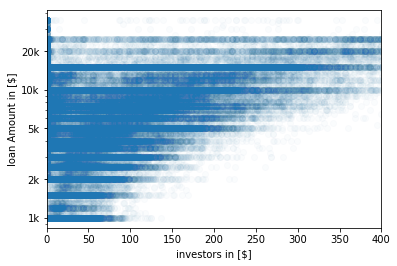

In [12]:
# loan amount vs investors
plotscatter(loan["Investors"], loan['LoanOriginalAmount'], 400, 'investors')

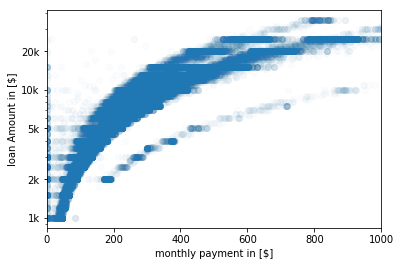

In [46]:
# loan amount vs monthly loan payment
plotscatter(loan["MonthlyLoanPayment"], loan['LoanOriginalAmount'], 1000, 'monthly payment')

in the above graph, mothnly payment remain to be highly correlated than the rest of variable. however, the is a concavity that hides the linear relationship that exist between mothlypayment and orginal loan amount. i will attempt to correct the scale to find linear relationship later.

for now lets get back to categorical variable.

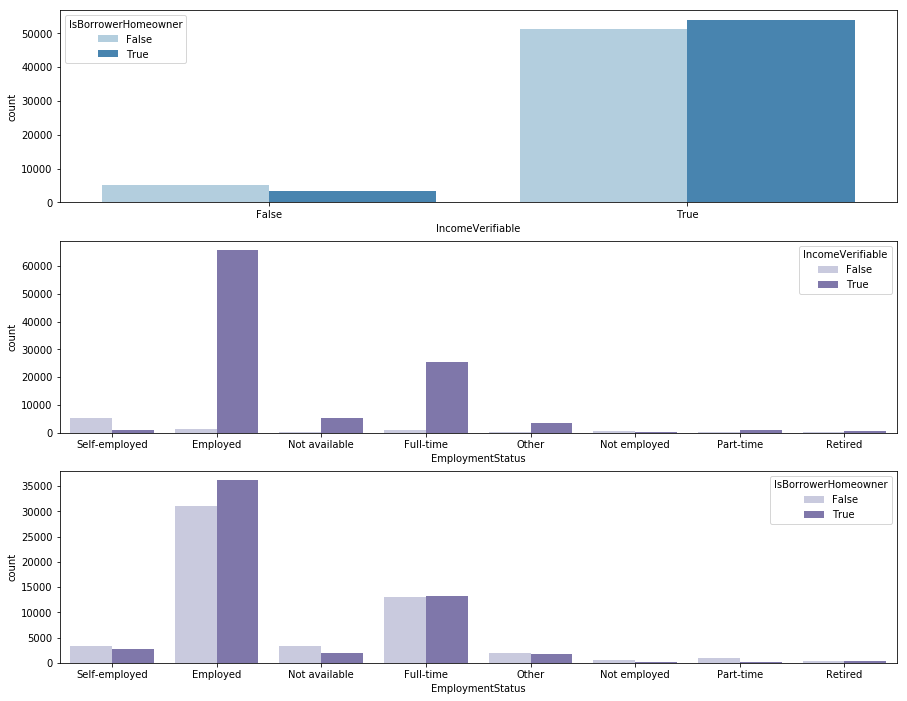

In [51]:
# plotting clustered bar chart
plt.figure(figsize = [15, 12])

# subplot 1: income verifiable vs home owner
plt.subplot(3, 1, 1)
sb.countplot(data = loan, x = 'IncomeVerifiable', hue= 'IsBorrowerHomeowner', palette = 'Blues')

# subplot 2: income verifiable vs. employment status
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan, x = 'EmploymentStatus', hue= 'IncomeVerifiable', palette = 'Purples')

# subplot 3: home owner vs. employment status 
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan, x = 'EmploymentStatus', hue= 'IsBorrowerHomeowner', palette = 'Purples');

home ownership don't seem to discriminate between having verifiable income or not. however, being impolyed highly suggests have verifiable income and this is expceted. nevertheless, home ownership didn't have strong relation with employment status. although there are many employed people own home, there are also comparable number of employed people whodoesn't own home.

let's even see deeper 

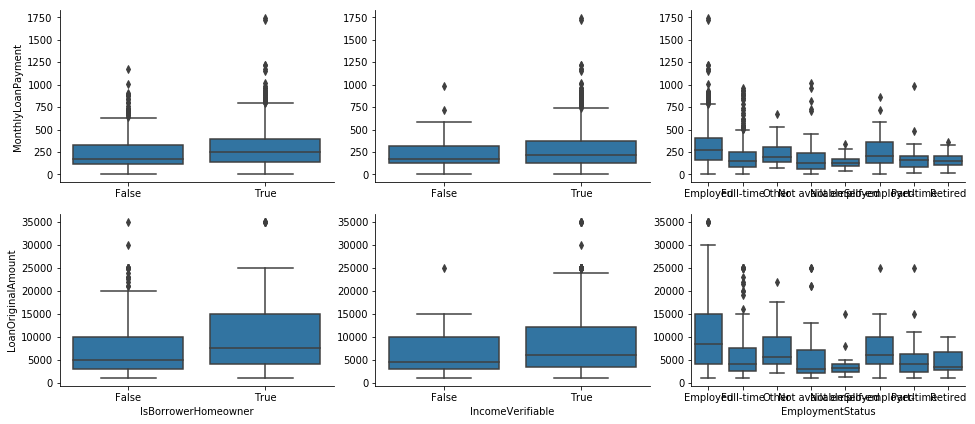

In [68]:
# ploting boxplot for all the categorical variables (get this piece of code from example file)
loan_samp = loan.sample(n=2000, replace = False)
categoric_vars=['IsBorrowerHomeowner', 'IncomeVerifiable','EmploymentStatus' ]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan_samp, y_vars = ['MonthlyLoanPayment', 'LoanOriginalAmount'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

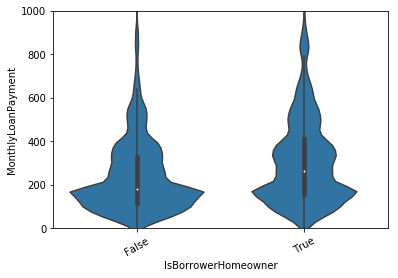

In [66]:
# plot violin chart
plt.Figure(figsize=(15, 10))

base_color = sb.color_palette()[0]
sb.violinplot(data=loan, x='IsBorrowerHomeowner', y='MonthlyLoanPayment', color = base_color)
plt.xticks(rotation=30)
plt.ylim([0, 1000]);

plt.show()

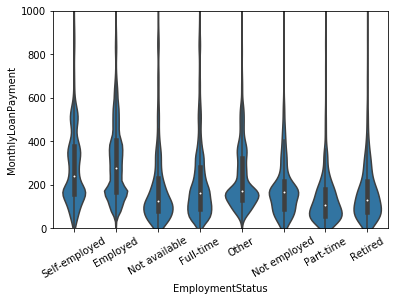

In [67]:
# plot box chart
plt.Figure(figsize=(15, 10))

base_color = sb.color_palette()[0]
sb.violinplot(data=loan, x='EmploymentStatus', y='MonthlyLoanPayment', color = base_color)
plt.xticks(rotation=30)
plt.ylim([0, 1000]);

plt.show()

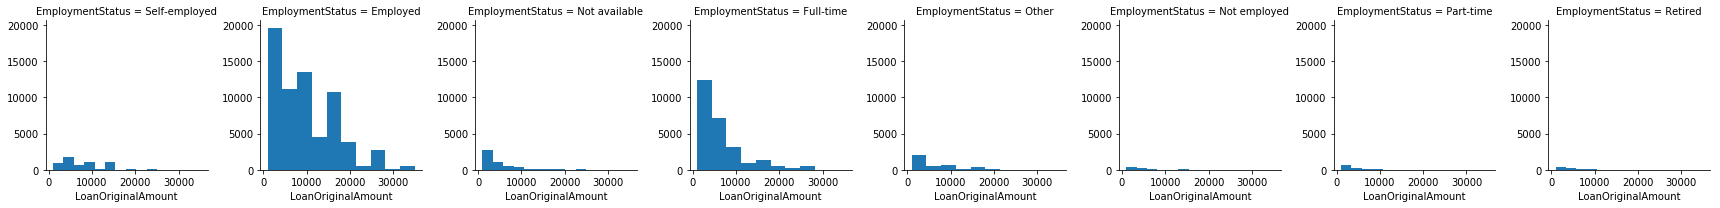

In [93]:
# Plot the Seaborn's FacetGrid
plt.Figure(figsize=(10,8))
g = sb.FacetGrid(data = loan  , col = 'EmploymentStatus')
g.map(plt.hist, 'LoanOriginalAmount')
plt.show();

from all the above diagrams, it is possible to conclude that the categorical variable as well as some numeric varaible have no concrete relationship to our variable of interest or each other. consequently, I won't persue them anymore.

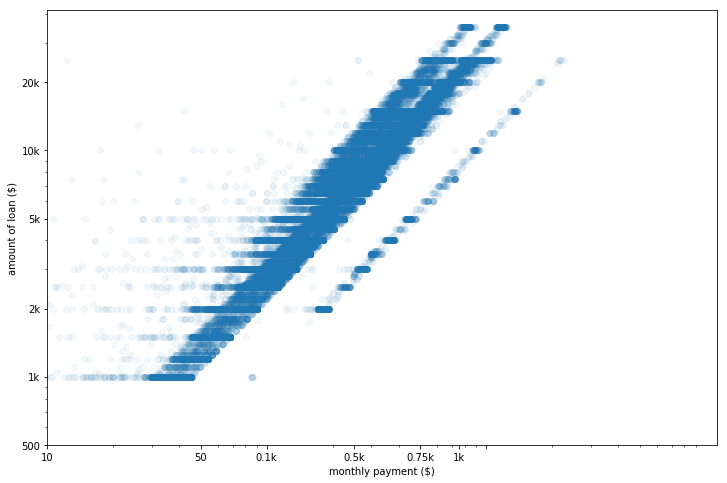

In [10]:
# scatter plot of price vs. carat, with log transform of both axis by log scale.

plt.figure(figsize = [12, 8])
plt.scatter(data = loan, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount', alpha = 1/20)

plt.xscale('log')
plt.xticks([10,50,100,250,500,750, 1e3,], [10, 50, '0.1k', '0.5k', '0.75k','1k'])
plt.xlabel('monthly payment ($)')

plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('amount of loan ($)')

plt.show();

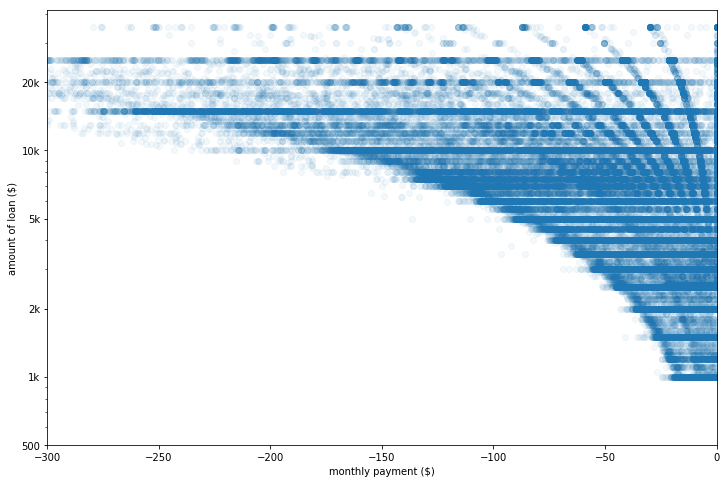

In [17]:
# ploting amount of loan vs service fee after tranformation of loan amount axis by log and service fee axis by xlim
plt.figure(figsize = [12, 8])
plt.scatter(data = loan, x = 'LP_ServiceFees', y = 'LoanOriginalAmount', alpha = 1/20)

plt.xlim([-300,0])
plt.xlabel('monthly payment ($)')

plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('amount of loan ($)')

plt.show;

now it become obvioisly clear that monthly loan payment and amount of the loan is strongly and positively correlated. and also the relationship is linear. where as service fee is some how negatively correlated with amount of the loan. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> To my suprise monthly income and investors are weakly correlated with amount of the loan, where as monthly loan payment have strong positive corelation with amount of the loan. log scale transformation have to be performed before linear relationship was obcerved. likewise, service fee has medium negative correlation with the amount of loan and all the other numeric variable.

other wise, all other categorical variable showed no correlation with main variable of interset or to the rest variable.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> service fee is negatively correlated with loan amount and other variables in the dataset. and it seems it's strongly and negatively correlated with investor feature. this will be explored further below. however, the vast majority of the rest of the variable show no correlation with amount of loan or each other. as a result, they wouldn't be considered in any further investigation. NB. we have to keep in mind that service fees are listed in negative numbers which means as service fee decrees the loan amount and monthly payment increases. Below, I will look into the behavior of the three interest variables in multivariate exploration,

## Multivariate Exploration



below I will investigate further the relationship between monthly loan payment, service fee and loan amount.

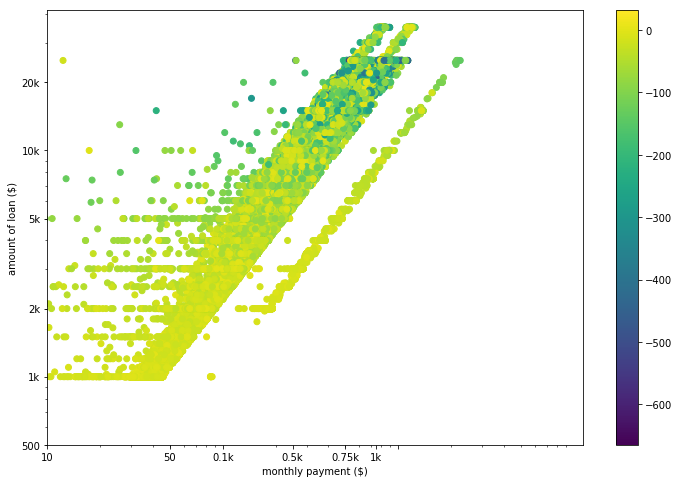

In [4]:
# ploting scatter with color for third variable
plt.figure(figsize = [12, 8])

plt.scatter(data = loan, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount', c = 'LP_ServiceFees')
plt.colorbar()

# transforming to log scales 
plt.xscale('log')
plt.xticks([10,50,100,250,500,750, 1e3,], [10, 50, '0.1k', '0.5k', '0.75k','1k'])
plt.xlabel('monthly payment ($)')

plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('amount of loan ($)')

plt.show();

we can we from the above graph that, there the more service fee is at the bottom which is 0 and the less service fees are at the top of the graph which are negative numbers. The strengthen the previous finding that monthly payment and loan amount are positively correlated with each other, whereas, service fee is inversily related with both. 

now lets see the relationship between monthly payment, loan amount and investors.

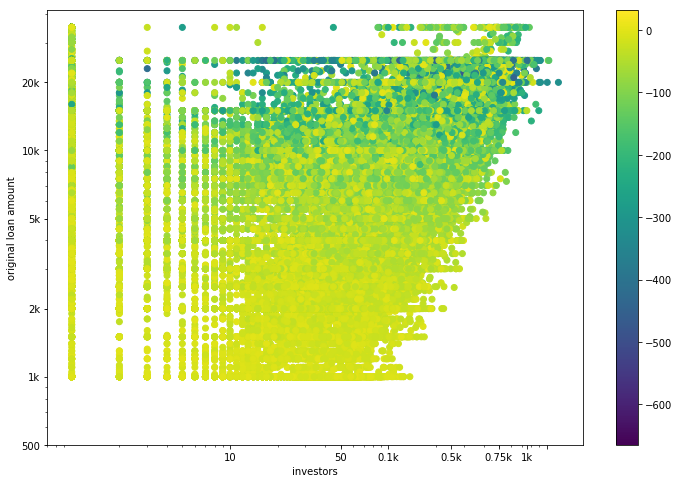

In [6]:
# ploting scatter with color for third variable

plt.figure(figsize=[12, 8])
plt.scatter(data = loan, x = 'Investors', y = 'LoanOriginalAmount', c = 'LP_ServiceFees')
plt.colorbar()

# transforming to log scales 
plt.xscale('log')
plt.xticks([10,50,100,250,500,750, 1e3,], [10, 50, '0.1k', '0.5k', '0.75k','1k'])
plt.xlabel('investors')

plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('original loan amount')
plt.show();

I noticed taht although there is stringer negative correlation between service fee and investors, it didn't bring significant change when considered with other variables.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The relationship between monthly payment and original loan amount are still strong when additional variable was added. in additon, the inversity of service fee variable increased when plot against the two above variables. this migbt be additive effect of the two separate correlations. 

### Were there any interesting or surprising interactions between features?

> there was stronger negative correlation between service and investors in Bivariate comparisons. However, this doesn't improve much when third variable was considered. 

## Conclusions
>loan prosper dataset were chosen and visualized for insight and new information. the aim was to find variables that are highly correlated with loan amount. and fo this, various features were used to analyse from such as montly income, employment status, and mothly payment. first single univariate exploration was done followed by bivariate and multivariate exploration. additionally, different transformation has be performed. finally, it's figured out that most of the variables don't have strong correlation with variable of the interest. However, it's found that monthly payment is strongly and positively correlated with loan amount, and service fee was some how negatively correlated with amount of loan. 
